In [6]:
import os
import seaborn as sns
from utils import *
from plots import *
from constants import *
%load_ext autoreload
%autoreload 2
BASE_DATA_PATH = os.path.join("..", "results")
OUTPUT_FOLDER = os.path.join("..", "out", "figures", "benchmarks")

DATA_SUBSET = os.path.join(BASE_DATA_PATH, "subset")
DATA_KNN_SUBSET = os.path.join(BASE_DATA_PATH, "knn_subset")
DATA_KNN_FULL = os.path.join(BASE_DATA_PATH, "knn_full")
DATA_FULL = os.path.join(BASE_DATA_PATH, "full")
DATA_PARALLEL_SUBSET = os.path.join(BASE_DATA_PATH, "parallel_subset")
DATA_PARALLEL_FULL = os.path.join(BASE_DATA_PATH, "parallel_full")

set_default_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-12-11-13:51:48.csv


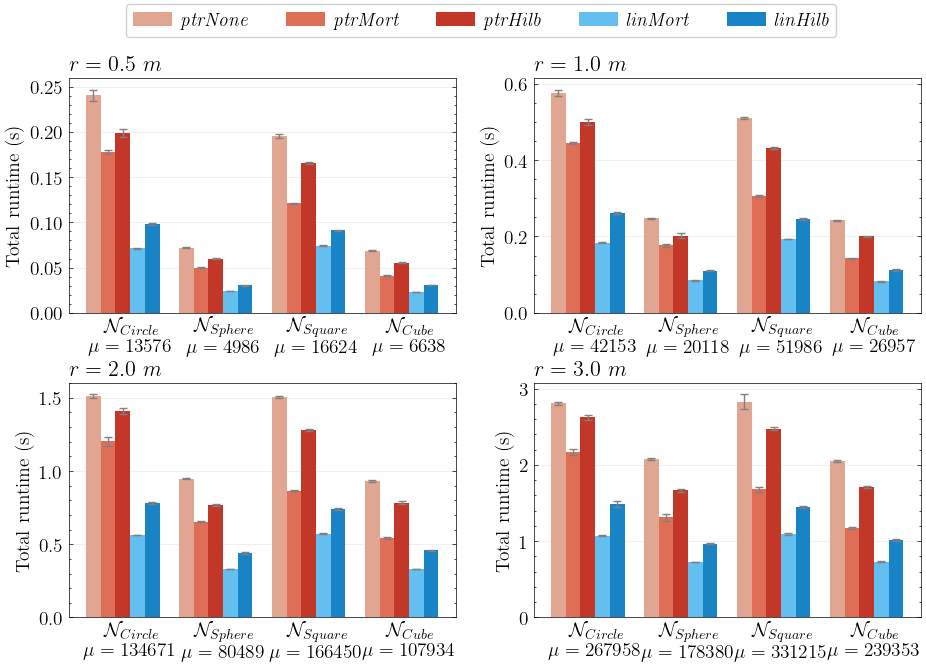

In [7]:
# Paris_Luxembourg_6 SUBSETS
fig = plot_runtime_comparison(DATA_SUBSET, "Paris_Luxembourg_6", OCTREE_ENCODER, cols=2, figsz=(11,7), algos=[NEIGHBOURS, NEIGHBOURS_PTR])
output_fig(fig, OUTPUT_FOLDER, "fig_paris_luxembourg_6_random")
display(fig)

Loading results file: ../results/other/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-05-29-02:38:08.csv


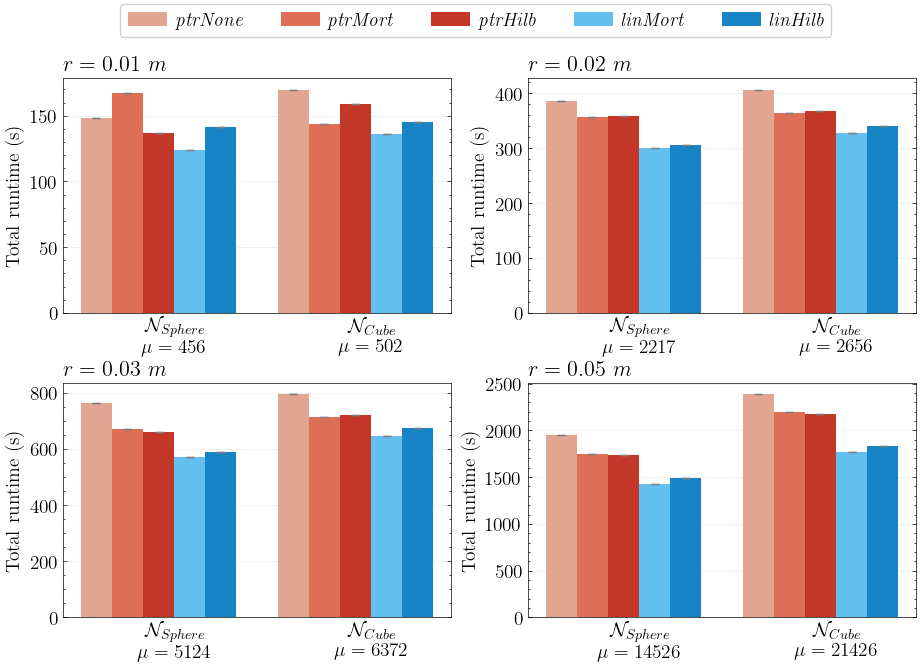

In [8]:
# sg27 FULL
# put this data on another folder since we used different radii for the comparison with other structures
fig = plot_runtime_comparison(os.path.join(BASE_DATA_PATH, "other"), "sg27_station8_intensity_rgb", OCTREE_ENCODER, cols=2, figsz=(11,7), algos=[NEIGHBOURS, NEIGHBOURS_PTR])
output_fig(fig, OUTPUT_FOLDER, "fig_sg27_full")
display(fig)

Loading results file: ../results/subset/Lille_0/Lille_0-2025-12-11-13:45:24.csv
Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-12-11-13:51:48.csv
Loading results file: ../results/subset/5080_54400/5080_54400-2025-12-11-13:50:02.csv
Loading results file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-12-11-14:02:38.csv
Loading results file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-12-11-14:07:35.csv
Loading results file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-12-11-15:33:45.csv


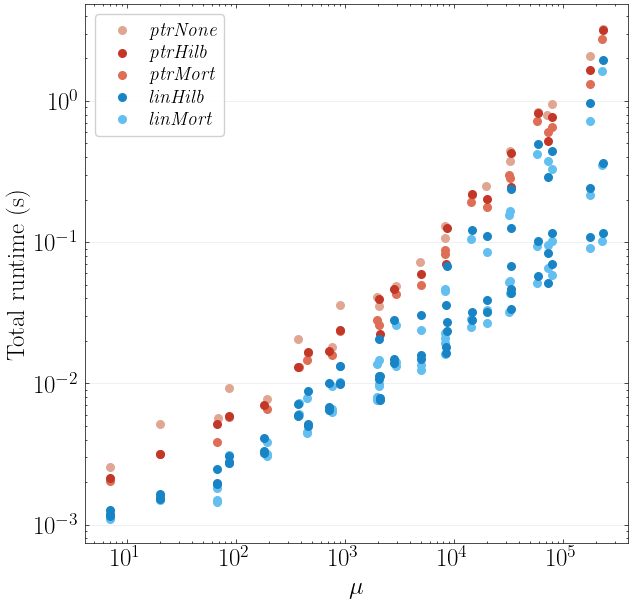

In [9]:
# log-log SUBSETS
fig = plot_result_sizes_runtime_log(DATA_SUBSET, ALL_CLOUDS, OCTREE_ENCODER, kernel="Sphere")
output_fig(fig, OUTPUT_FOLDER, "fig_loglog_random")
display(fig)

Loading results file: ../results/subset/Lille_0/Lille_0-2025-12-11-13:45:24.csv
Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-12-11-13:51:48.csv
Loading results file: ../results/subset/5080_54400/5080_54400-2025-12-11-13:50:02.csv
Loading results file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-12-11-14:02:38.csv
Loading results file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-12-11-14:07:35.csv
Loading results file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-12-11-15:33:45.csv


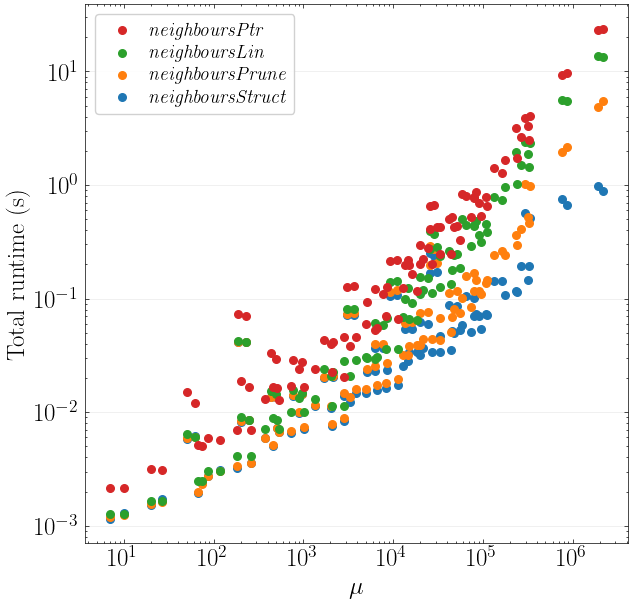

In [10]:
# log-log SUBSETS
fig = plot_result_sizes_runtime_log(DATA_SUBSET, ALL_CLOUDS, OUR_RADIUS, encoder=HILBERT_ENCODER)
output_fig(fig, OUTPUT_FOLDER, "fig_loglog_random_algos")
display(fig)

Loading results file: ../results/subset/Lille_0/Lille_0-2025-12-11-13:45:24.csv
Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-12-11-13:51:48.csv
Loading results file: ../results/subset/5080_54400/5080_54400-2025-12-11-13:50:02.csv
Loading results file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-12-11-14:02:38.csv
Loading results file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-12-11-14:07:35.csv
Loading results file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-12-11-15:33:45.csv


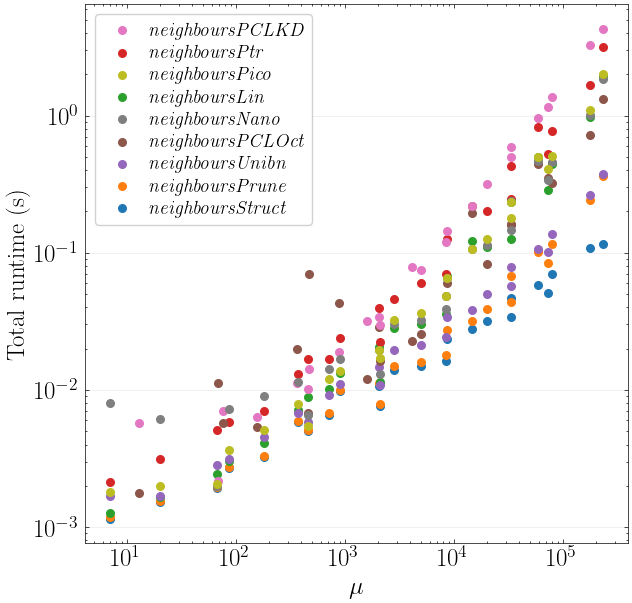

In [11]:
fig = plot_result_sizes_runtime_log(DATA_SUBSET, ALL_CLOUDS, ALL_RADIUS, encoder=HILBERT_ENCODER, kernel="Sphere")
output_fig(fig, OUTPUT_FOLDER, "fig_loglog_random_structures_sphere")
display(fig)

In [12]:
def plot_all_heatmaps(data_path, cloud, save = False):
    source_str = "full" if data_path == DATA_PARALLEL_FULL else "subset"
    algos = [NEIGHBOURS_PTR, NEIGHBOURS, NEIGHBOURS_PRUNE, NEIGHBOURS_STRUCT, NEIGHBOURS_NANOFLANN, NEIGHBOURS_PICO]
    for algo in algos:
        fig = plot_octree_parallelization(data_path, cloud, algo, True, encoder=HILBERT_ENCODER)
        print(algo)
        display(fig)
        if save:
            output_fig(fig, OUTPUT_FOLDER, f"parallel/fig_{cloud}_parallel_{source_str}_{algo}")
        plt.close(fig)


Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighboursPtr


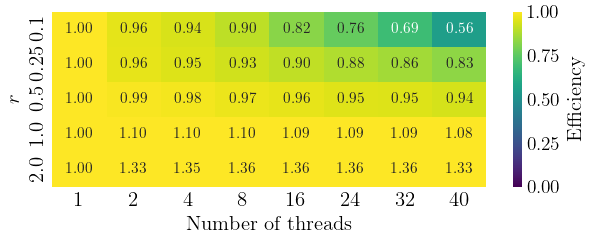

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighbours


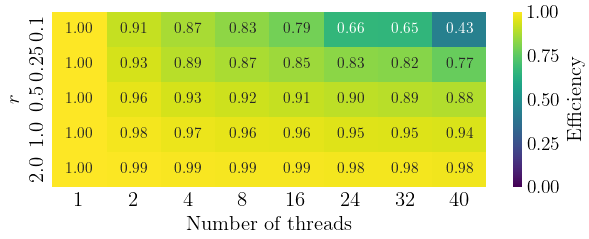

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighboursPrune


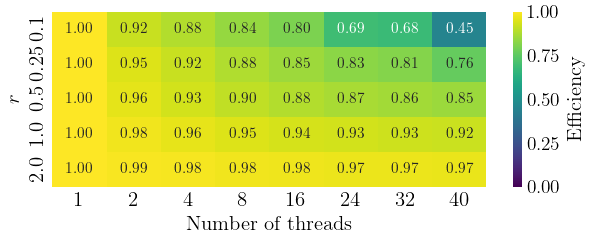

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighboursStruct


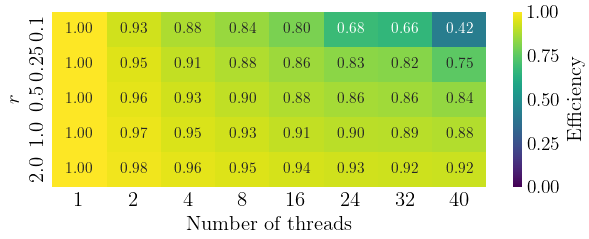

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighboursNanoflann


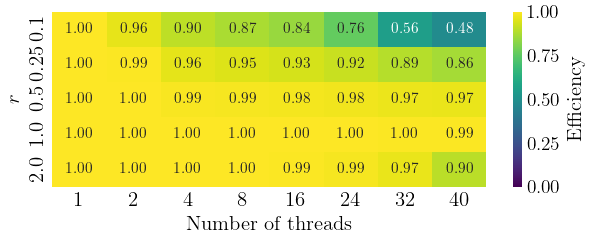

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighboursPico


/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


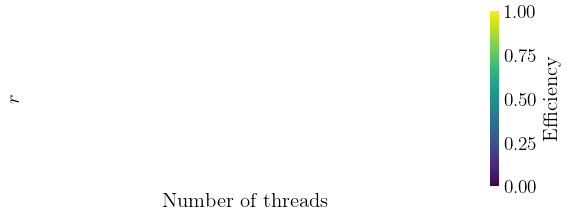

In [13]:
# parallel SUBSETS
plot_all_heatmaps(DATA_PARALLEL_FULL, "Lille_0", True)

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighboursPtr


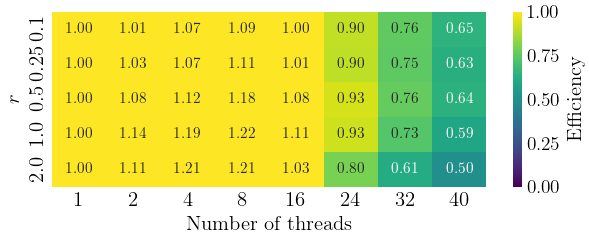

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighbours


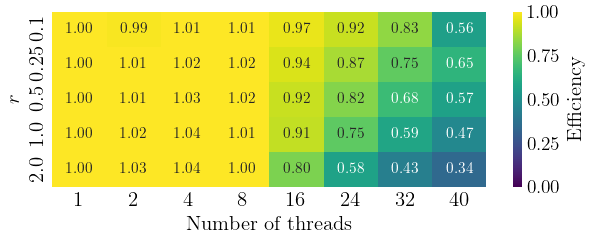

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighboursPrune


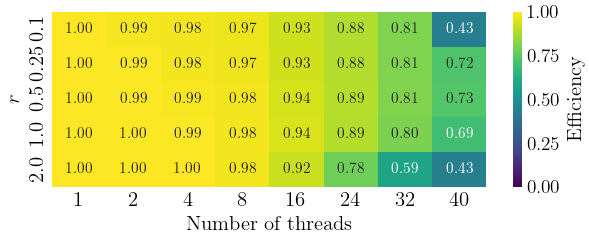

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighboursStruct


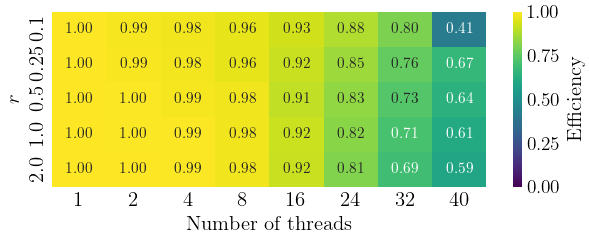

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighboursNanoflann


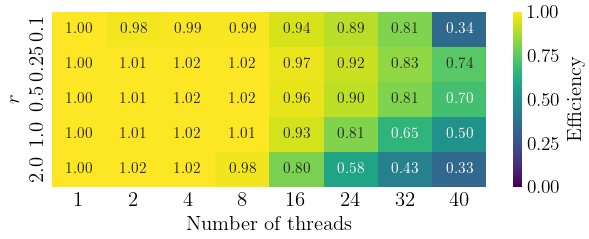

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighboursPico


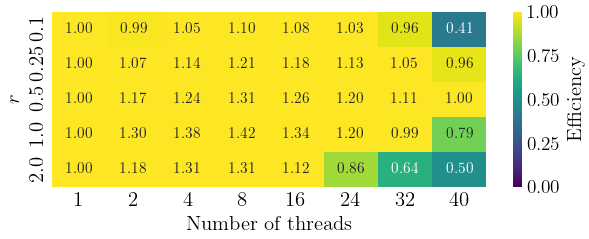

In [14]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "Paris_Luxembourg_6", True)

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighboursPtr


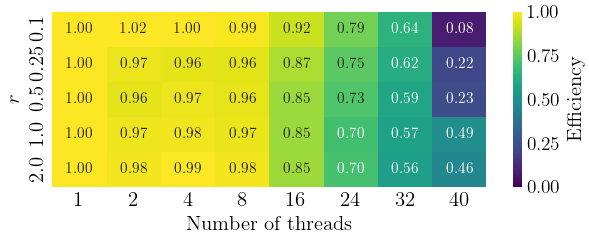

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighbours


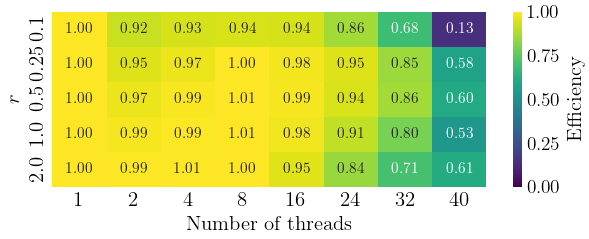

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighboursPrune


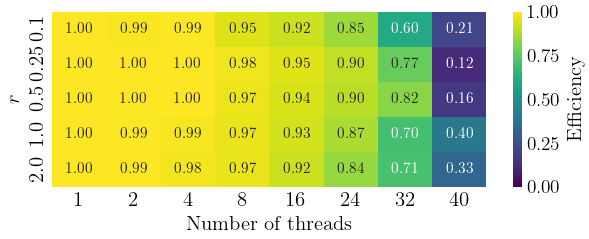

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighboursStruct


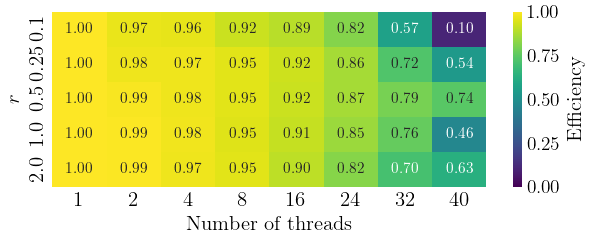

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighboursNanoflann


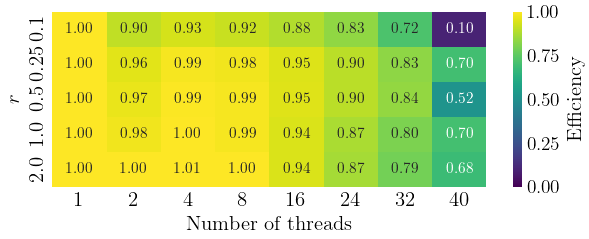

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighboursPico


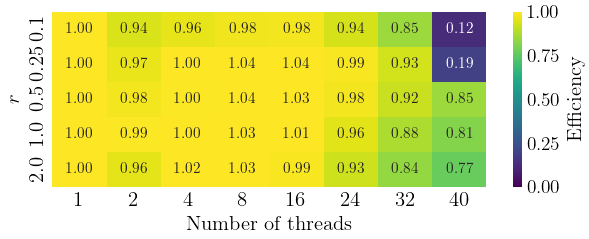

In [15]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "5080_54400", True)

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighboursPtr


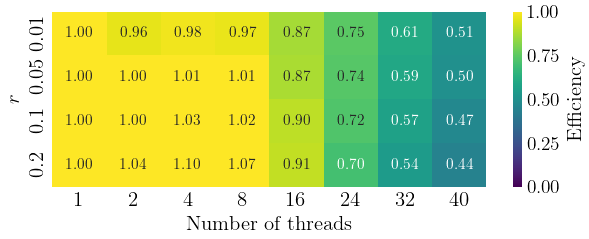

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighbours


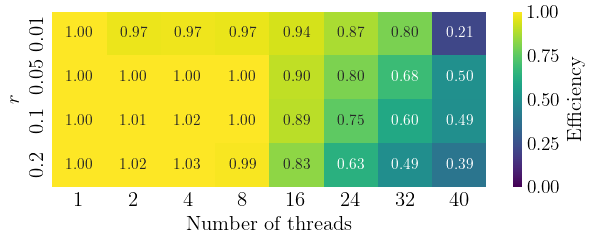

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighboursPrune


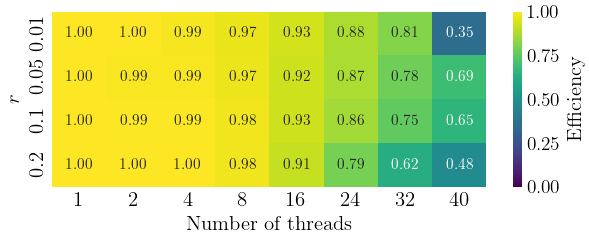

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighboursStruct


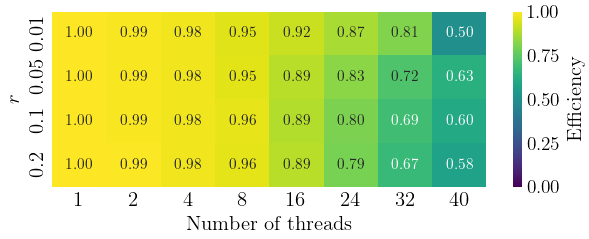

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighboursNanoflann


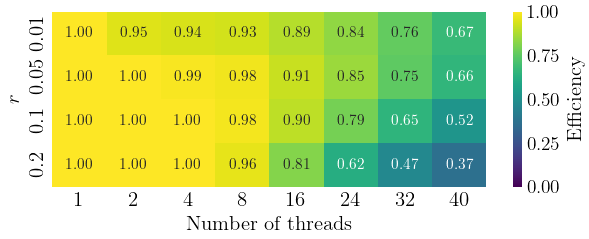

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighboursPico


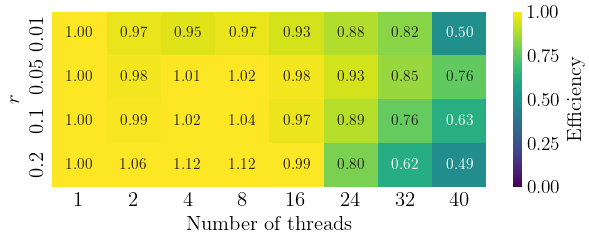

In [16]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "bildstein_station1_xyz_intensity_rgb", True)

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighboursPtr


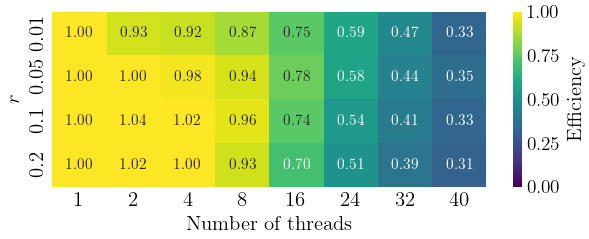

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighbours


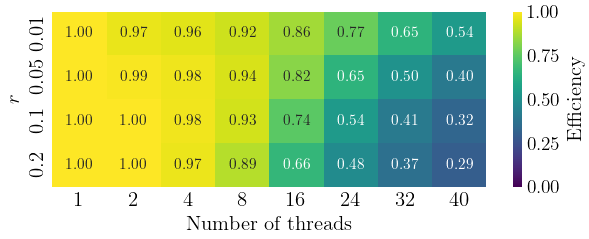

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighboursPrune


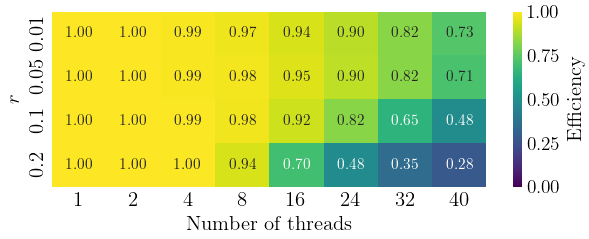

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighboursStruct


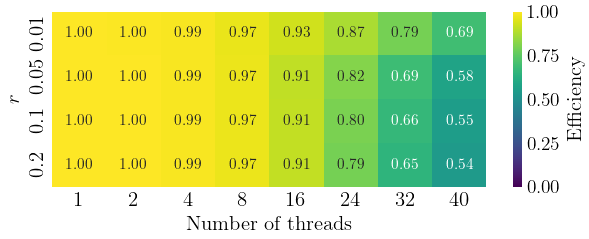

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighboursNanoflann


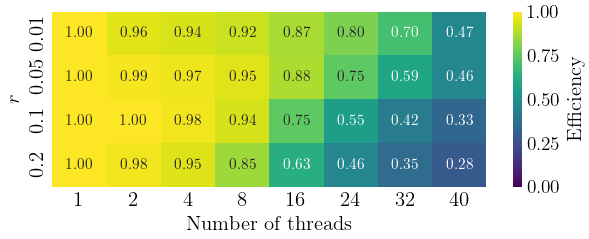

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighboursPico


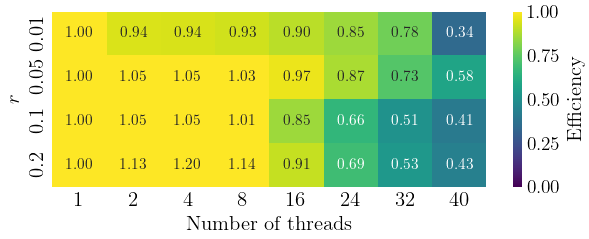

In [17]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "sg27_station8_intensity_rgb", True)

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighboursPtr


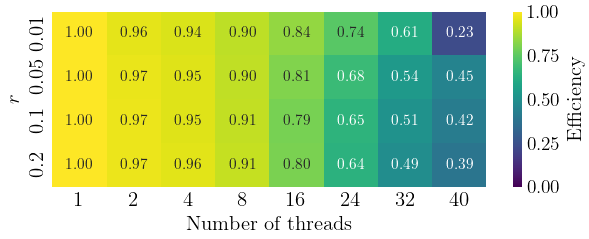

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighbours


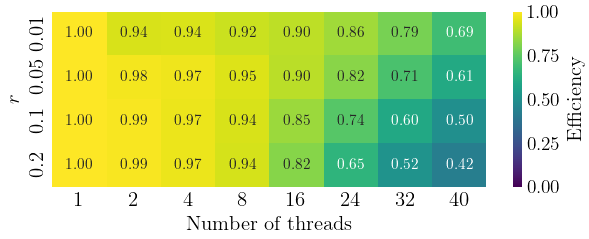

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighboursPrune


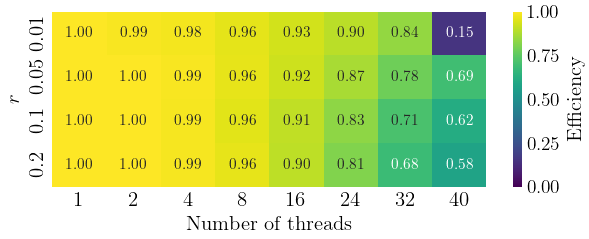

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighboursStruct


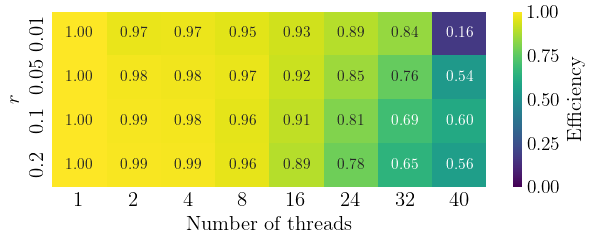

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighboursNanoflann


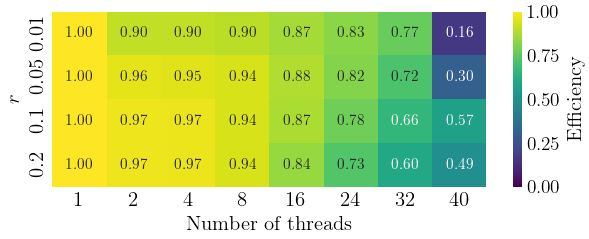

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighboursPico


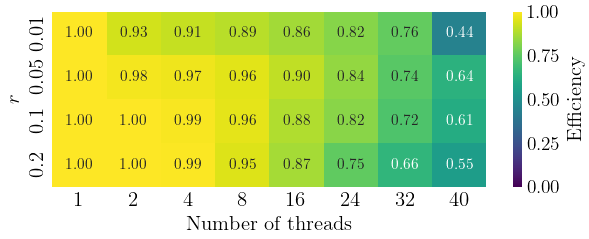

In [18]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "Speulderbos_2017_TLS", True)

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighboursPtr


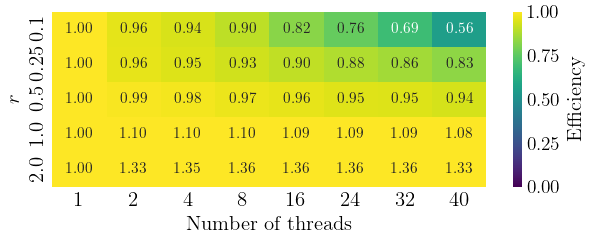

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighbours


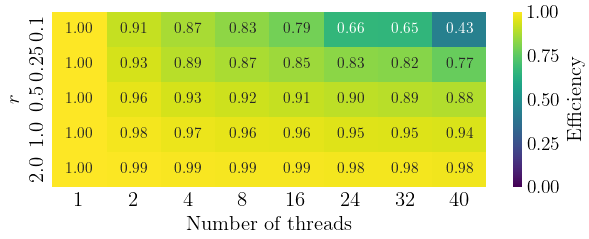

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighboursPrune


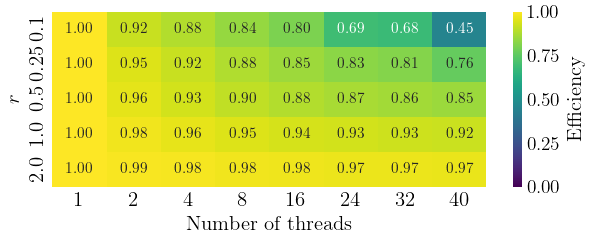

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighboursStruct


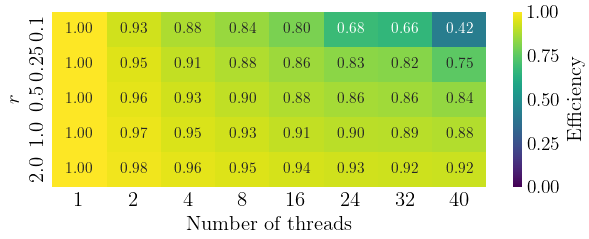

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighboursNanoflann


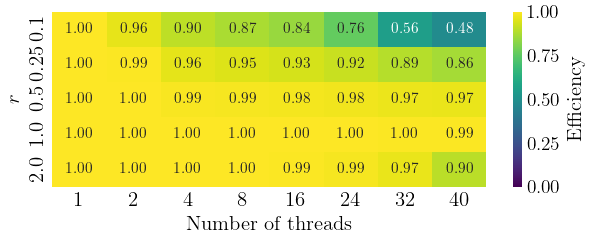

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighboursPico


/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


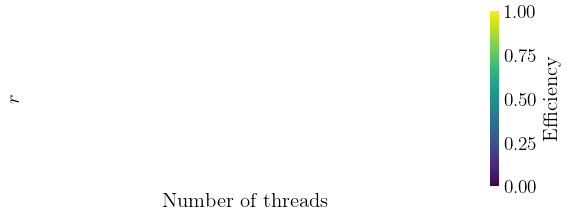

In [19]:
plot_all_heatmaps(DATA_PARALLEL_FULL, "Lille_0", True)

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighboursPtr


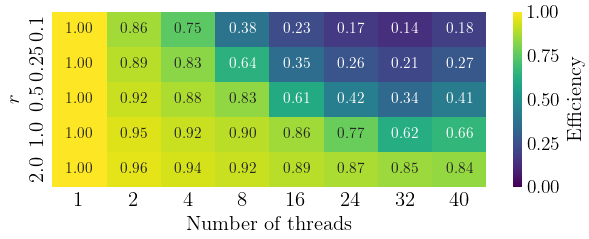

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighbours


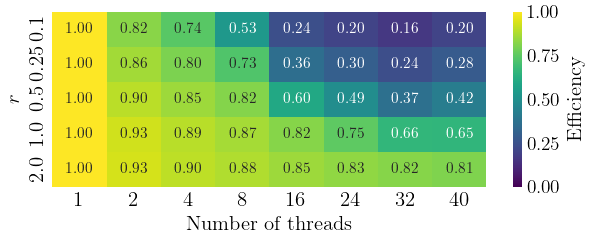

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighboursPrune


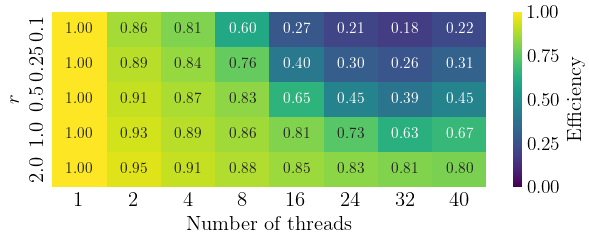

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighboursStruct


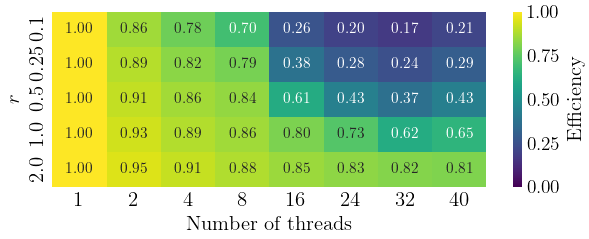

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighboursNanoflann


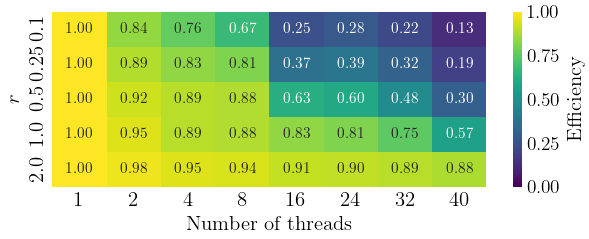

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighboursPico


/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


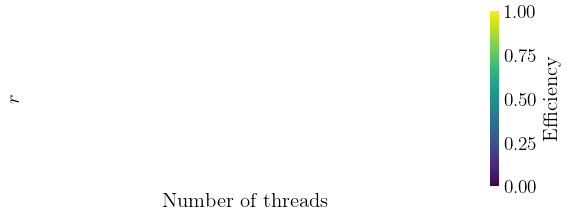

In [20]:
plot_all_heatmaps(DATA_PARALLEL_FULL, "5080_54400", True)

Loading results file: ../results/knn_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-07-12-13:22:30.csv


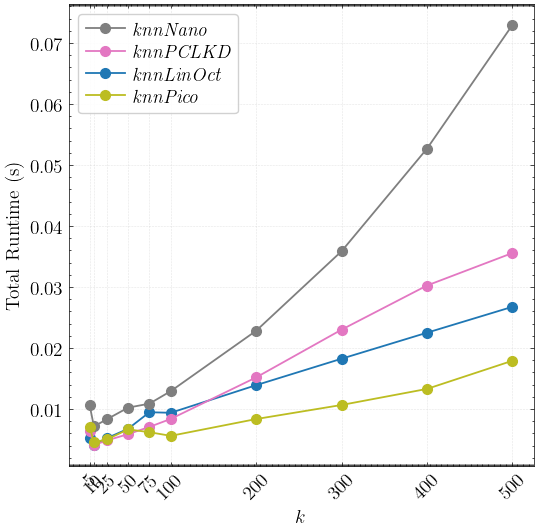

In [21]:

fig = plot_knn_comparison(DATA_KNN_SUBSET, "sg27_station8_intensity_rgb", ALL_KNN, high_limit=500, 
                     struct_whitelist={NANOFLANN_KDTREE, PCL_KDTREE, LINEAR_OCTREE, PICO_KDTREE})
output_fig(fig, OUTPUT_FOLDER, "fig_sg27_knn_random")
display(fig)

Loading results file: ../results/knn_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-07-12-13:55:04.csv


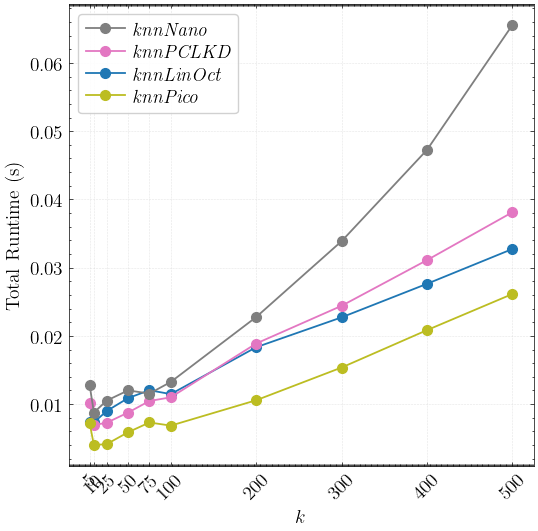

In [22]:
fig = plot_knn_comparison(DATA_KNN_SUBSET, "Speulderbos_2017_TLS", ALL_KNN, high_limit=500, 
                     struct_whitelist={NANOFLANN_KDTREE, PCL_KDTREE, LINEAR_OCTREE, PICO_KDTREE})
output_fig(fig, OUTPUT_FOLDER, "fig_speulderbos_knn_random")
display(fig)

Loading results file: ../results/knn_subset/Lille_0/Lille_0-2025-07-12-13:11:11.csv


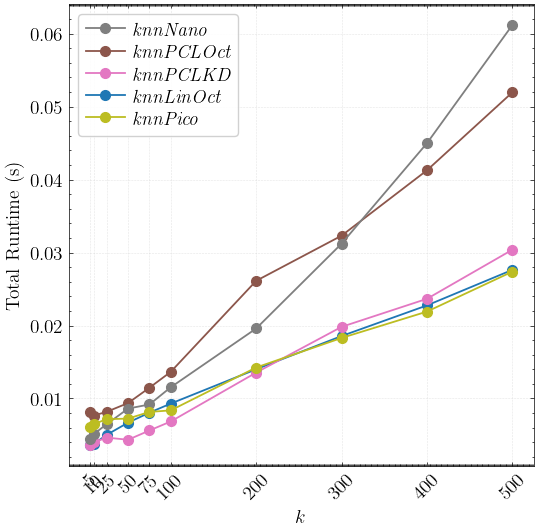

In [23]:
fig = plot_knn_comparison(DATA_KNN_SUBSET, "Lille_0", ALL_KNN, high_limit=500)
output_fig(fig, OUTPUT_FOLDER, "fig_lille0_knn_random")
display(fig)

Loading results file: ../results/knn_full/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-06-12:08:45.csv


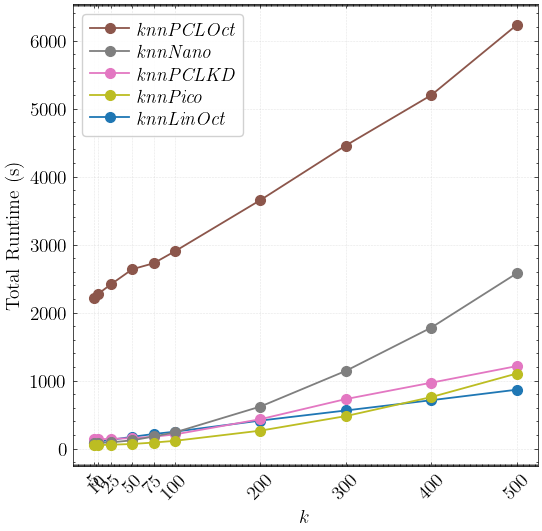

In [24]:
fig = plot_knn_comparison(DATA_KNN_FULL, "sg27_station8_intensity_rgb", ALL_KNN, high_limit=500)
output_fig(fig, OUTPUT_FOLDER, "fig_sg27_knn_full")
display(fig)

Loading results file: ../results/knn_full/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-05-23:45:05.csv


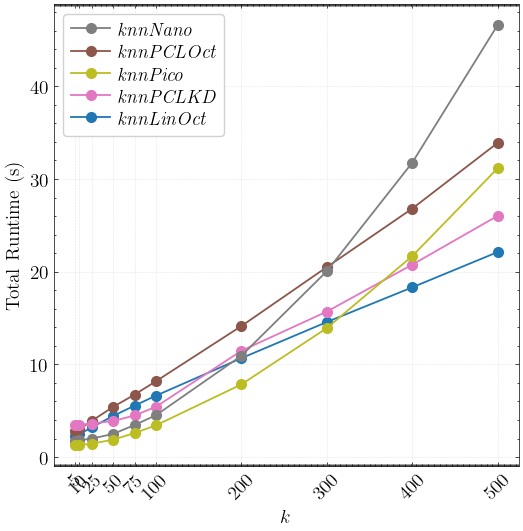

In [25]:
fig = plot_knn_comparison(DATA_KNN_FULL, "Paris_Luxembourg_6", ALL_KNN, high_limit=500)
output_fig(fig, OUTPUT_FOLDER, "fig_parislux6_knn_full")
display(fig)

Loading results file: ../results/knn_full/5080_54400/5080_54400-2025-11-07-02:02:39.csv


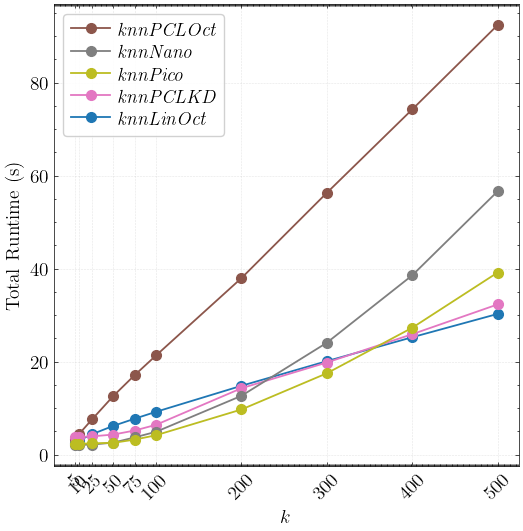

In [26]:
fig = plot_knn_comparison(DATA_KNN_FULL, "5080_54400", ALL_KNN, high_limit=500)
output_fig(fig, OUTPUT_FOLDER, "fig_5080_54400_knn_full")
display(fig)

In [27]:
# Hilbert 
table_speedup_vs_baseline(DATA_FULL, ALL_CLOUDS, "Sphere", ALL_RADIUS, encoder=HILBERT_ENCODER)

Loading results file: ../results/full/Lille_0/Lille_0-2025-05-28-22:42:26.csv
Loading results file: ../results/full/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-05-29-01:03:58.csv
Loading results file: ../results/full/5080_54400/5080_54400-2025-05-28-22:12:56.csv
Loading results file: ../results/full/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-05-28-20:49:36.csv
Loading results file: ../results/full/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-05-29-02:38:08.csv
Loading results file: ../results/full/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-05-29-06:57:10.csv


,Size Range,Structure,Average Runtime (ms),Speedup
0,1e+01–1e+03,\textit{neighboursStruct},115.9348,1.25x
2,1e+01–1e+03,\textit{neighboursLin},138.5146,1.05x
3,1e+01–1e+03,\textit{neighboursPtr},145.4796,1.00x
8,1e+01–1e+03,\textit{neighboursPico},156.4283,0.93x
1,1e+01–1e+03,\textit{neighboursPrune},173.4390,0.84x
7,1e+01–1e+03,\textit{neighboursNano},202.0391,0.72x
4,1e+01–1e+03,\textit{neighboursUnibn},210.1960,0.69x
5,1e+01–1e+03,\textit{neighboursPCLOct},277.1180,0.52x
6,1e+01–1e+03,\textit{neighboursPCLKD},N/A,N/A
9,1e+03–1e+05,\textit{neighboursStruct},72.1305,2.72x


Loading results file: ../results/subset/Lille_0/Lille_0-2025-12-11-13:45:24.csv
Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-12-11-13:51:48.csv
Loading results file: ../results/subset/5080_54400/5080_54400-2025-12-11-13:50:02.csv
Loading results file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-12-11-14:02:38.csv
Loading results file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-12-11-14:07:35.csv
Loading results file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-12-11-15:33:45.csv
neighboursUnibn 36.97807969363139
neighboursPCLOct 20.53713009896391
neighboursPCLKD -1.2225353045280616
neighboursNanoflann 21.728589394916717
neighboursPico 28.718672220492156
neighboursPtr 13.198628614521974


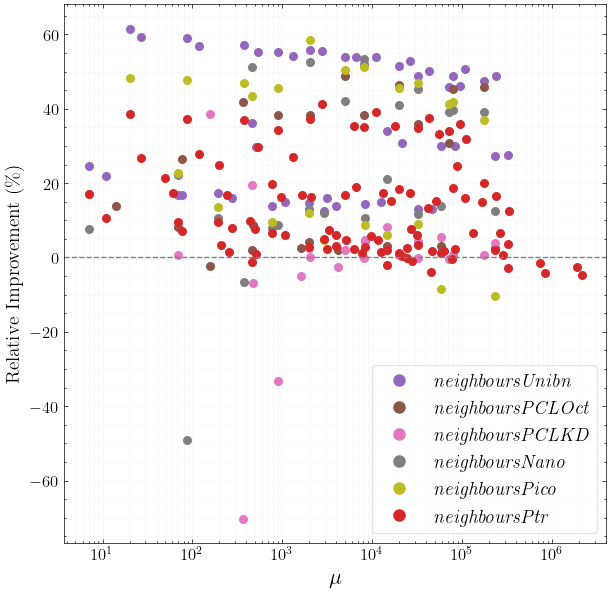

In [28]:
set_default_style(font_size=15, axes_labelsize=16, legend_fontsize=15)
fig = plot_encoder_improvement(DATA_SUBSET, ALL_CLOUDS, OTHER_RADIUS + POINTER_OCTREE_RADIUS, 
                            NO_ENCODER, HILBERT_ENCODER,
                            kernel="all")
output_fig(fig, OUTPUT_FOLDER, "fig_subset_none_vs_hilb")
fig

Loading results file: ../results/subset/Lille_0/Lille_0-2025-12-11-13:45:24.csv
Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-12-11-13:51:48.csv
Loading results file: ../results/subset/5080_54400/5080_54400-2025-12-11-13:50:02.csv
Loading results file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-12-11-14:02:38.csv
Loading results file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-12-11-14:07:35.csv
Loading results file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-12-11-15:33:45.csv
neighboursStruct -8.782106174197525
neighboursPrune -8.04655812894542
neighbours -13.639884914766057
neighboursPtr -13.44274205718081
neighboursUnibn -7.5368878727819535
neighboursPCLOct 5.824747096050519
neighboursPCLKD -4.265747408141359
neighboursNanoflann -8.932506092007456
neighboursPico 3.781242275891376


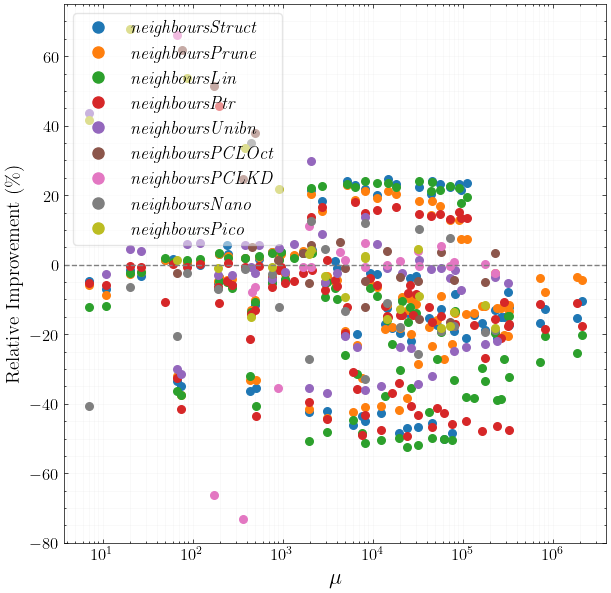

In [29]:
fig = plot_encoder_improvement(DATA_SUBSET, ALL_CLOUDS, ALL_RADIUS, 
                            MORTON_ENCODER, HILBERT_ENCODER,
                            kernel="all", fs_legend=13)
output_fig(fig, OUTPUT_FOLDER, "fig_subset_mort_vs_hilb")
fig

Loading results file: ../results/full/Lille_0/Lille_0-2025-05-28-22:42:26.csv
Loading results file: ../results/full/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-05-29-01:03:58.csv
Loading results file: ../results/full/5080_54400/5080_54400-2025-05-28-22:12:56.csv
Loading results file: ../results/full/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-05-28-20:49:36.csv
Loading results file: ../results/full/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-05-29-02:38:08.csv
Loading results file: ../results/full/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-05-29-06:57:10.csv
neighboursUnibn 29.205378425051126
neighboursPCLOct 10.826837044218735
neighboursPCLKD 0.5599356690753637
neighboursNanoflann 14.977387556609285
neighboursPico 12.646380948372967
neighboursPtr 22.4631617514036


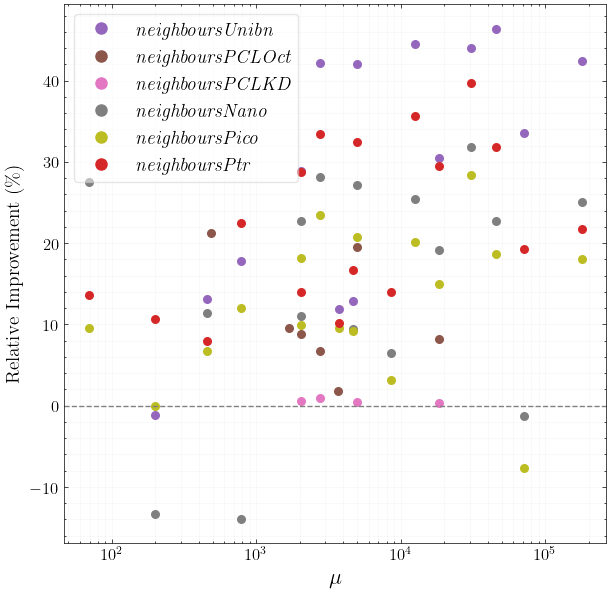

In [30]:
fig = plot_encoder_improvement(DATA_FULL, ALL_CLOUDS, OTHER_RADIUS + POINTER_OCTREE_RADIUS, 
                            NO_ENCODER, HILBERT_ENCODER,
                            kernel="Sphere")
output_fig(fig, OUTPUT_FOLDER, "fig_full_none_vs_hilb")
fig

Loading results file: ../results/full/Lille_0/Lille_0-2025-05-28-22:42:26.csv
Loading results file: ../results/full/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-05-29-01:03:58.csv
Loading results file: ../results/full/5080_54400/5080_54400-2025-05-28-22:12:56.csv
Loading results file: ../results/full/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-05-28-20:49:36.csv
Loading results file: ../results/full/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-05-29-02:38:08.csv
Loading results file: ../results/full/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-05-29-06:57:10.csv
neighboursStruct 2.671978049310639
neighboursPrune 2.4024562048382707
neighbours -0.733818742604712
neighboursPtr 4.327451510412493
neighboursUnibn -0.7754924955958159
neighboursPCLOct 0.571630536003382
neighboursPCLKD 0.10126325634008923
neighboursNanoflann -0.6275689856218659
neighboursPico 2.0784046181242064


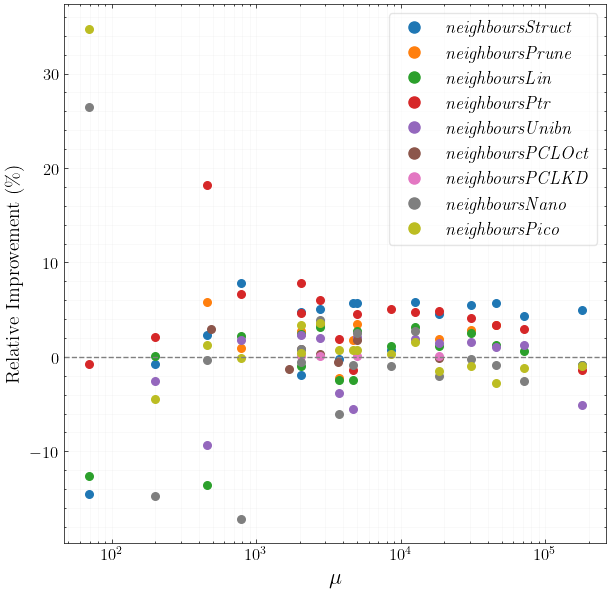

In [31]:
fig = plot_encoder_improvement(DATA_FULL, ALL_CLOUDS, ALL_RADIUS, 
                            MORTON_ENCODER, HILBERT_ENCODER,
                            kernel="Sphere", fs_legend=13)
output_fig(fig, OUTPUT_FOLDER, "fig_full_mort_vs_hilb")
fig